In [2]:
!pip install -q -U kaggle_environments

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

Турнир завершен! Результаты:
anti_copy_agent: 4 побед
paper_agent: 3 побед
copy_opponent: 2 побед
rock_agent: 2 побед
scissors_agent: 2 побед
mirror_agent: 2 побед
counter_cycle_agent: 2 побед
cycle_agent: 1 побед
random_agent: 0 побед
pattern_agent: 0 побед
random_based_agent: 0 побед
history_based_agent: 0 побед
adaptive_agent: 0 побед


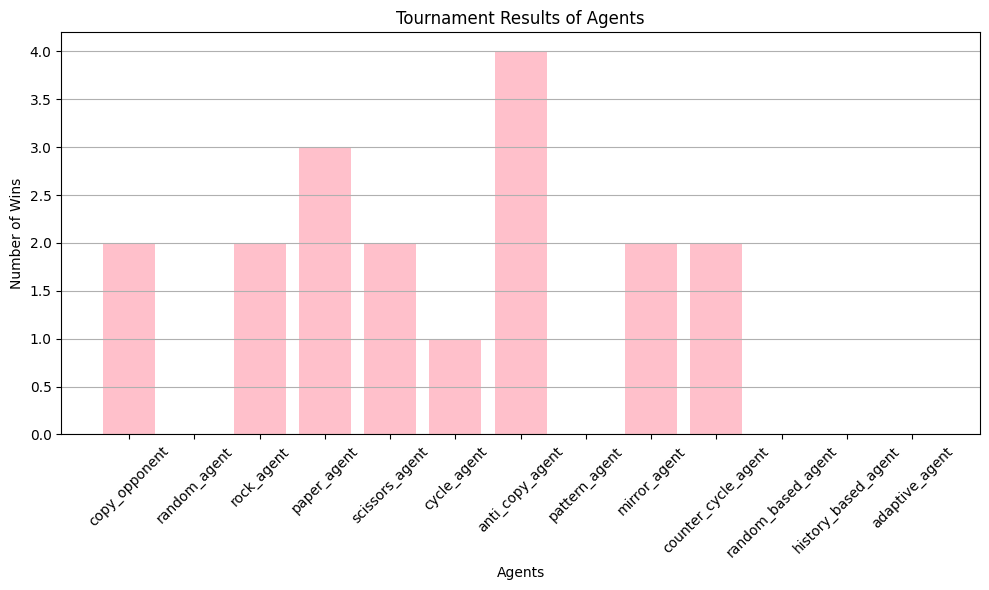

In [6]:

#Стратегия копирования последнего шага оппонента
def copy_opponent(observation, configuration):
    #in case we have information about opponent last move
    if observation.step > 0:
        return observation.lastOpponentAction
    #initial step
    else:
        return random.randrange(0, configuration.signs)

# Стратегия: каждый ход выбирает случайное действие.
def random_agent(observation, configuration):
    return random.randrange(0, configuration.signs)

# Стратегия: всегда выбирает "камень".
def rock_agent(observation, configuration):
    return 0  # 0 соответствует "камню"

# Стратегия: всегда выбирает "бумагу".
def paper_agent(observation, configuration):
    return 1  # 1 соответствует "бумаге"

# Стратегия: всегда выбирает "ножницы".
def scissors_agent(observation, configuration):
    return 2  # 2 соответствует "ножницам"

# Стратегия: циклически выбирает "камень", "ножницы", "бумагу".
def cycle_agent(observation, configuration):
    return observation.step % 3  # Ходы: камень -> ножницы -> бумага

def anti_copy_agent(observation, configuration):
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % 3  # Побеждает прошлый ход
    else:
        return random.randrange(0, configuration.signs)

# Стратегия: анализирует шаблоны в действиях противника.
def pattern_agent(observation, configuration):
    return random.randrange(0, configuration.signs)

# Стратегия: выбирает противоположное действие по отношению к последнему ходу оппонента.
def mirror_agent(observation, configuration):
    if observation.step > 0:
        return (observation.lastOpponentAction + 2) % 3  # Противоположный ход
    else:
        return random.randrange(0, configuration.signs)

# Стратегия: пытается предугадать циклическую стратегию противника и сделать контр-ход.
def counter_cycle_agent(observation, configuration):
    return (observation.step + 1) % 3  # Побеждает текущий шаг цикла

# Стратегия: случайный выбор с предпочтением к одному из ходов.
def random_based_agent(observation, configuration):
    return random.choices([0, 1, 2], weights=[0.5, 0.3, 0.2])[0]  # Предпочтение "камню"

# Стратегия: анализирует историю предыдущих игр, чтобы предсказать поведение противника.
def history_based_agent(observation, configuration):
    # Если первый ход, выбираем случайно
    if observation.step == 0:
        return random.randrange(0, configuration.signs)

    # Анализируем историю предыдущих ходов противника
    opponent_history = observation["action_history"]
    opponent_moves = [action for action in opponent_history if action is not None]

    if not opponent_moves:
        return random.randrange(0, configuration.signs)

    # Вычисляем наиболее часто используемый ход противником
    move_counts = [0, 0, 0]  # Счетчик для камня, бумаги и ножниц
    for move in opponent_moves:
        move_counts[move] += 1

    # Предполагаем, что противник сыграет наиболее часто используемый ход
    predicted_move = move_counts.index(max(move_counts))

    # Возвращаем ход, который побеждает предсказанный
    return (predicted_move + 1) % 3

# Стратегия: анализирует историю предыдущих игр, чтобы предсказать поведение противника.
def adaptive_agent(observation, configuration):
    # Если первый ход, выбираем случайно
    if observation.step == 0:
        return random.randrange(0, configuration.signs)

    # Анализируем историю предыдущих ходов противника
    opponent_history = observation["action_history"]
    opponent_moves = [action for action in opponent_history if action is not None]

    if not opponent_moves:
        return random.randrange(0, configuration.signs)

    # Вычисляем наиболее часто используемый ход противником
    move_counts = [0, 0, 0]  # Счетчик для камня, бумаги и ножниц
    for move in opponent_moves:
        move_counts[move] += 1

    # Предполагаем, что противник сыграет наиболее часто используемый ход
    predicted_move = move_counts.index(max(move_counts))

    # Возвращаем ход, который побеждает предсказанный
    return (predicted_move + 1) % 3

# Список агентов для турнира
agents = [
    copy_opponent,
    random_agent,
    rock_agent,
    paper_agent,
    scissors_agent,
    cycle_agent,
    anti_copy_agent,
    pattern_agent,
    mirror_agent,
    counter_cycle_agent,
    random_based_agent,
    history_based_agent,
    adaptive_agent
]

# Проводим турнир между всеми агентами
results = {agent.__name__: 0 for agent in agents}  # Словарь для записи побед

#Сталкиваем всех агентов между собой
for i in range(len(agents)):
    for j in range(i + 1, len(agents)):
        agent1 = agents[i]
        agent2 = agents[j]
        # Используем evaluate для проведения матчей
        match_results = evaluate(
            "rps",  # Игра "Камень-ножницы-бумага"
            [lambda obs, conf: agent1(obs, conf), lambda obs, conf: agent2(obs, conf)],
            configuration={"episodeSteps": 100},
            num_episodes=1  # Количество эпизодов для одного матча
        )

        # Подсчитываем количество побед каждого агента
        agent1_wins = 0
        agent2_wins = 0

        for result in match_results:
            if result[0] is not None and result[1] is not None:  # Проверка на None
                if result[0] > result[1]:
                    agent1_wins += 1
                elif result[1] > result[0]:
                    agent2_wins += 1

        # Увеличиваем счет победителя
        if agent1_wins > agent2_wins:
            results[agent1.__name__] += 1
        elif agent2_wins > agent1_wins:
            results[agent2.__name__] += 1

# Вывод результатов
print("Турнир завершен! Результаты:")
for agent_name, score in sorted(results.items(), key=lambda x: -x[1]):
    print(f"{agent_name}: {score} побед")

# Построение гистограммы результатов
df_results = pd.DataFrame(list(results.items()), columns=['Agent', 'Wins'])

plt.figure(figsize=(10, 6))
plt.bar(df_results['Agent'], df_results['Wins'], color='pink')
plt.xlabel('Agents')
plt.ylabel('Number of Wins')
plt.title('Tournament Results of Agents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()